In [4]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from numpy import array
import scipy.stats as st
from scipy.stats import linregress
from itertools import cycle, islice
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
import seaborn as sns
from collections import Counter
import plotly.express as px
from math import pi
import pygal

In [2]:
from config import cid
from config import secret
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)



In [3]:
# Using Spotipy library function, to get a list of genres available for the recommendations function.
recommendation_genre_list = sp.recommendation_genre_seeds()

# Creating a list, containing the list of available genres, returned in the 'recommendation_genre_list'
spotify_genre_list = recommendation_genre_list['genres']

# Printing the list, to visually represent genres in scope.
print(spotify_genre_list)

# Determining length of list / how many genres in scope.
print(len(spotify_genre_list))

#pprint(recommendation_genre_list)

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep', 'power-po

In [4]:
# Creating lists to appeand the requested values returned in the JSON file, from the API call.
tracks_genre=[]
tracks_name = []
tracks_popularity = []

# List to store track ID's
tracks_id = []

# Initialising a counter, as we iterate through the below for loop 
#counter = 0

# 3 genres had missing data; this caused issues with 'arrays must all be same length in python using pandas DataFrame', which impacted the ability to turn our lists into a DataFrame.
# we therefore decided to remove the genres with missing data.
spotify_genre_list.remove('funk')
spotify_genre_list.remove('new-release')
spotify_genre_list.remove('pop-film')

# Printing spotify_genre_list to verify reove of 'pop-film'
print(spotify_genre_list)

# For loop to iterate through every genre, API call will return songs (limit=100) for ever genre in the list.
for genre in spotify_genre_list:
    randoms = sp.recommendations(seed_genres=[genre], limit=100)
    
# Inner for loop that will try within a range of 100 to append track genre, name, id and popularity
    for album_ind in range(0,100):
        try:
            tracks_genre.append(randoms['seeds'][0]['id'])
            tracks_name.append(randoms['tracks'][album_ind]['name'])
            tracks_id.append(randoms['tracks'][album_ind]['id'])
            tracks_popularity.append(randoms['tracks'][album_ind]['popularity'])
            #print(f"{counter}")
            # Counter adds 1 for every successful for loop iteration
            #counter +=1
            # Error handling, that will print the offending genre name and error message if the for loop fails an iteration for a specific genre in scope.
        except IndexError:
            print(genre)
            print("It didn't work!")      

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'post-dubstep', 'power-pop', 'progressive-house', 'psych-roc

In [5]:
# Dataframe, comprised of values from lists including Genre, Track Name, Track ID and Popularity.
track_dataframe = pd.DataFrame({'Genre':tracks_genre,'Track Name' : tracks_name, 'Track ID' : tracks_id, 'Popularity' : tracks_popularity})

# Also adding column headings, to refernence and populate in next the audio features, for the next API Call.
track_dataframe['Loudness']=""
track_dataframe['Tempo']=""
track_dataframe['Duration_ms']=""
track_dataframe['Energy']=''
track_dataframe['Key']=''
track_dataframe['Instrumentalness']=''
track_dataframe['Speechiness']=''
track_dataframe['Valence']=''
track_dataframe['Danceability']=''
track_dataframe.head()

Genre                   Track Name                Track ID  Popularity  \
0  acoustic                Say Something  6Vc5wAMmXdKIAM7WUoEb7N          77   
1  acoustic    Sitting, Waiting, Wishing  5eWOsyHHic4vJP3LjTVhqv          65   
2  acoustic              This Years Love  3l5GdoaOPPVWRjIgbTBejJ           1   
3  acoustic  Heaven (feat. Megan Nicole)  755WE9qLMDJFlVfci5suzT           0   
4  acoustic          Rolling in the Deep  6ZPJun3hVXkjR62q6GxJh1          39   

  Loudness Tempo Duration_ms Energy Key Instrumentalness Speechiness Valence  \
0                                                                              
1                                                                              
2                                                                              
3                                                                              
4                                                                              

  Danceability  
0               
1               
2               
3               
4

In [6]:
# Initialising counter, for audio features for loop
counter = 0

# Creating lists to appeand the requested values returned in the JSON file, from the API call.
tracks_loudness =[]
tracks_instrumentalness=[]
tracks_speechiness=[]
tracks_tempo=[]
tracks_duration_ms=[]
tracks_energy=[]
tracks_key=[]
tracks_valence=[]
tracks_danceability =[]

# API CALL 2-2
# For loop, to iterate through every track_id and return the below audio features, we will use as the foundation of the analysis and subsequent figures.
for tid in tracks_id:
    features = sp.audio_features(tid)
    tracks_loudness.append(features[0]['loudness'])
    tracks_instrumentalness.append(features[0]['instrumentalness'])
    tracks_speechiness.append(features[0]['speechiness'])
    tracks_tempo.append(features[0]['tempo'])
    tracks_duration_ms.append(features[0]['duration_ms'])
    tracks_energy.append(features[0]['energy'])
    tracks_key.append(features[0]['key'])
    tracks_valence.append(features[0]['valence'])
    tracks_danceability.append(features[0]['danceability'])
#   Adding to the counter, after every iteration of the for loop
    counter +=1
# Printing the counter, to visualise the process of the for loop
   # print(f"{counter}")




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [8]:
# Assigning / adding returned JSON values to columns in the track_dataframe DataFrame.
track_dataframe['Loudness']= tracks_loudness
track_dataframe['Tempo']= tracks_tempo
track_dataframe['Duration_ms']= tracks_duration_ms
track_dataframe['Energy']= tracks_energy
track_dataframe['Key']= tracks_key
track_dataframe['Instrumentalness']= tracks_instrumentalness
track_dataframe['Speechiness']= tracks_speechiness
track_dataframe['Valence']=tracks_valence
track_dataframe['Danceability']=tracks_danceability

# # Setting the Genre as the index
# track_dataframe=track_dataframe.set_index('Genre')
# track_dataframe.head()


In [9]:
# Removing duplicates, by Track ID, as
cleansed_df = track_dataframe.drop_duplicates(subset='Track ID', keep='first')
cleansed_df.head()

Genre                   Track Name                Track ID  Popularity  \
0  acoustic                Say Something  6Vc5wAMmXdKIAM7WUoEb7N          77   
1  acoustic    Sitting, Waiting, Wishing  5eWOsyHHic4vJP3LjTVhqv          65   
2  acoustic              This Years Love  3l5GdoaOPPVWRjIgbTBejJ           1   
3  acoustic  Heaven (feat. Megan Nicole)  755WE9qLMDJFlVfci5suzT           0   
4  acoustic          Rolling in the Deep  6ZPJun3hVXkjR62q6GxJh1          39   

   Loudness    Tempo  Duration_ms  Energy  Key  Instrumentalness  Speechiness  \
0    -8.822  141.284       229400   0.147    2          0.000003       0.0355   
1    -7.229  105.019       183720   0.535    0          0.000025       0.0265   
2    -8.848  166.366       245946   0.208    8          0.000029       0.0288   
3   -10.238  129.960       250063   0.280    8          0.000000       0.0317   
4   -10.550  105.006       248147   0.457    0          0.001680       0.0279   

   Valence  Danceability  
0   0.0765         0.407  
1   0.5480         0.765  
2   0.1930         0.324  
3   0.2940         0.620  
4   0.5280         0.799

In [10]:
# Writing Cleansed DataFrame to a .csv file
cleansed_df.to_csv("cleansed_live_df.csv")

In [5]:
#reading cleansed_df.csv file
cleansed="cleansed_df.csv"
cleansed_df=pd.read_csv(cleansed)
cleansed_df

Genre                                         Track Name  \
0         acoustic                                               Free   
1         acoustic                                    Better Together   
2         acoustic                                          Good Life   
3         acoustic          When I Was Your Man (feat. Fifth Harmony)   
4         acoustic                                        Bad Romance   
5         acoustic                                      Jar of Hearts   
6         acoustic                                               Baby   
7         acoustic                       Keep It Loose, Keep It Tight   
8         acoustic                                            Trouble   
9         acoustic                                        Skinny Love   
10        acoustic                      Last Kiss (feat. Megan & Liz)   
11        acoustic                                               Kids   
12        acoustic                                            Fix You   
13        acoustic                                               E.T.   
14        acoustic             Chasing Pavements (Live at Hotel Cafe)   
15        acoustic                                   Hey, Soul Sister   
16        acoustic                    I Will Follow You Into The Dark   
17        acoustic                                    Banana Pancakes   
18        acoustic                                             U.N.I.   
19        acoustic                                          Only Love   
20        acoustic                                         Wonderwall   
21        acoustic       Next To Me - Live From Spotify NYC, USA/2012   
22        acoustic                                               Roar   
23        acoustic                                  Hey There Delilah   
24        acoustic                                           Delicate   
25        acoustic                                  Welcome Home, Son   
26        acoustic       What The Water Gave Me - MTV Unplugged, 2012   
27        acoustic                                        Skinny Love   
28        acoustic  Valerie - Live At BBC Radio 1 Live Lounge, Lon...   
29        acoustic               Use Somebody (feat. Hannah Trigwell)   
...            ...                                                ...   
10787  world-music                                              Orion   
10788  world-music                                         Pulo, Pulo   
10789  world-music                                           Golgotha   
10790  world-music                                            Friends   
10791  world-music                                      Langue Muette   
10792  world-music                              Amor De Loca Juventud   
10793  world-music                      365 Is My Number/ The Message   
10794  world-music                                           Slow Jam   
10795  world-music                                 Ride with Yourself   
10796  world-music                                             Sebero   
10797  world-music                                          Iyo Djeli   
10798  world-music                                            Sedjedo   
10799  world-music               Dream Weaver - Wayne's World Version   
10800  world-music                                   Beautiful Africa   
10801  world-music                                              Guisa   
10802  world-music                        Bala - feat. Zoumana Tereta   
10803  world-music                                              Suraj   
10804  world-music                                         Kita Kaira   
10805  world-music                                          Chan Chan   
10806  world-music                                    Welcome to Mali   
10807  world-music            Schumann - Kreisleriana, Opus 16 (1838)   
10808  world-music                                            Namania   
10809  world-music                                             Birima  

In [6]:
# Creating Genre-sorted DataFrame
grouped_dataframe=cleansed_df.groupby("Genre")
grouped_dataframe.mean()
grouped_df = pd.DataFrame(grouped_dataframe.mean())
grouped_df

Popularity   Loudness       Tempo    Duration_ms    Energy  \
Genre                                                                           
acoustic            36.200000  -9.343960  115.034710  232608.720000  0.417054   
afrobeat            11.540000  -8.392250  120.135060  299995.350000  0.654757   
alt-rock            28.840000  -6.820600  126.253570  244753.560000  0.755520   
alternative         46.928571  -6.271980  124.444653  233435.816327  0.743673   
ambient             21.260000 -19.182840  111.020520  331440.860000  0.280561   
anime               20.080000  -4.158250  139.422930  252603.160000  0.847440   
black-metal          8.690000  -7.251440  122.084550  335956.670000  0.892523   
bluegrass           17.770000  -9.635690  127.580610  213264.950000  0.510578   
blues               21.100000  -9.484330  123.832480  230558.510000  0.545815   
bossanova            6.250000 -12.211520  111.018320  197061.140000  0.415037   
brazil              28.440000  -8.661290  128.894290  226852.120000  0.603370   
breakbeat           11.270000  -7.922930  131.912450  335461.750000  0.804990   
british             34.787234  -6.553106  124.898372  233744.053191  0.743160   
cantopop            14.240000  -8.828720  123.331510  240993.420000  0.486560   
chicago-house        5.980000 -10.656970  122.461500  389122.990000  0.706540   
children            40.032258  -8.214409  117.919613  200501.774194  0.611817   
chill               44.492754  -8.355870  115.577681  263049.942029  0.542251   
classical           27.646465 -23.158444   98.401283  359095.646465  0.125164   
club                37.343434  -5.358333  125.614798  249106.757576  0.799485   
comedy              28.550000  -9.498960   97.782420  265552.110000  0.775340   
country             49.730000  -6.766290  123.533830  209313.280000  0.699130   
dance               35.353535  -5.580192  124.237495  234377.898990  0.780566   
dancehall           17.210000  -5.577990  121.046460  204314.340000  0.739800   
death-metal         21.000000  -6.527780  113.217810  250682.970000  0.945640   
deep-house          12.020619  -9.011773  121.616361  387753.329897  0.612670   
detroit-techno       7.505051 -12.552010  129.306081  361079.353535  0.655055   
disco               30.149425  -6.948046  122.651483  235744.540230  0.770057   
disney              35.215909 -14.402977  113.329193  189895.772727  0.351836   
drum-and-bass       10.020202  -4.611283  163.614141  317275.050505  0.884566   
dub                 17.739130  -5.078250  133.199967  294184.880435  0.817011   
...                       ...        ...         ...            ...       ...   
reggae              20.250000  -7.384261  114.383772  224951.391304  0.618359   
reggaeton           26.208333  -5.483271  115.601844  220774.958333  0.795948   
road-trip           31.282609  -7.059130  119.669022  241636.369565  0.702957   
rock                59.077778  -6.215289  126.418389  241648.500000  0.775767   
rock-n-roll         27.092308  -7.541585  125.911538  223663.184615  0.767677   
rockabilly          15.287234  -7.596745  130.311032  172295.989362  0.782713   
romance             41.617021  -6.800404  120.044936  239140.765957  0.630660   
sad                 41.191489  -7.031149  122.535000  240729.297872  0.537066   
salsa               26.030928  -6.098309  113.955010  281912.494845  0.756196   
samba                7.670103  -9.564629  114.293268  224489.402062  0.660598   
sertanejo           11.701031  -5.680794  130.192165  193160.989691  0.782814   
show-tunes          29.302083 -12.034833  116.592135  210561.447917  0.383635   
singer-songwriter   31.366667 -11.780833  124.970783  235063.333333  0.384075   
ska                 16.319588  -6.052454  136.038134  192731.329897  0.789588   
sleep               34.750000 -12.723111  120.724167  235785.138889  0.323708   
songwriter          23.489583 -10.848698  122.921667  248469.541667  0.482021   
soul                23.600000  -9.194118  122.7997

In [7]:
grouped_df.reset_index(drop=False, inplace=True)
grouped_df

Genre  Popularity   Loudness       Tempo    Duration_ms  \
0             acoustic   36.200000  -9.343960  115.034710  232608.720000   
1             afrobeat   11.540000  -8.392250  120.135060  299995.350000   
2             alt-rock   28.840000  -6.820600  126.253570  244753.560000   
3          alternative   46.928571  -6.271980  124.444653  233435.816327   
4              ambient   21.260000 -19.182840  111.020520  331440.860000   
5                anime   20.080000  -4.158250  139.422930  252603.160000   
6          black-metal    8.690000  -7.251440  122.084550  335956.670000   
7            bluegrass   17.770000  -9.635690  127.580610  213264.950000   
8                blues   21.100000  -9.484330  123.832480  230558.510000   
9            bossanova    6.250000 -12.211520  111.018320  197061.140000   
10              brazil   28.440000  -8.661290  128.894290  226852.120000   
11           breakbeat   11.270000  -7.922930  131.912450  335461.750000   
12             british   34.787234  -6.553106  124.898372  233744.053191   
13            cantopop   14.240000  -8.828720  123.331510  240993.420000   
14       chicago-house    5.980000 -10.656970  122.461500  389122.990000   
15            children   40.032258  -8.214409  117.919613  200501.774194   
16               chill   44.492754  -8.355870  115.577681  263049.942029   
17           classical   27.646465 -23.158444   98.401283  359095.646465   
18                club   37.343434  -5.358333  125.614798  249106.757576   
19              comedy   28.550000  -9.498960   97.782420  265552.110000   
20             country   49.730000  -6.766290  123.533830  209313.280000   
21               dance   35.353535  -5.580192  124.237495  234377.898990   
22           dancehall   17.210000  -5.577990  121.046460  204314.340000   
23         death-metal   21.000000  -6.527780  113.217810  250682.970000   
24          deep-house   12.020619  -9.011773  121.616361  387753.329897   
25      detroit-techno    7.505051 -12.552010  129.306081  361079.353535   
26               disco   30.149425  -6.948046  122.651483  235744.540230   
27              disney   35.215909 -14.402977  113.329193  189895.772727   
28       drum-and-bass   10.020202  -4.611283  163.614141  317275.050505   
29                 dub   17.739130  -5.078250  133.199967  294184.880435   
..                 ...         ...        ...         ...            ...   
92              reggae   20.250000  -7.384261  114.383772  224951.391304   
93           reggaeton   26.208333  -5.483271  115.601844  220774.958333   
94           road-trip   31.282609  -7.059130  119.669022  241636.369565   
95                rock   59.077778  -6.215289  126.418389  241648.500000   
96         rock-n-roll   27.092308  -7.541585  125.911538  223663.184615   
97          rockabilly   15.287234  -7.596745  130.311032  172295.989362   
98             romance   41.617021  -6.800404  120.044936  239140.765957   
99                 sad   41.191489  -7.031149  122.535000  240729.297872   
100              salsa   26.030928  -6.098309  113.955010  281912.494845   
101              samba    7.670103  -9.564629  114.293268  224489.402062   
102          sertanejo   11.701031  -5.680794  130.192165  193160.989691   
103         show-tunes   29.302083 -12.034833  116.592135  210561.447917   
104  singer-songwriter   31.366667 -11.780833  124.970783  235063.333333   
105                ska   16.319588  -6.052454  136.038134  192731.329897   
106              sleep   34.750000 -12.723111  120.724167  235785.138889   
107         songwriter   23.489583 -10.848698  122.921667  248469.541667   
108               soul   23.600000  -9.194118  122.799729  211245.835294   
109        soundtracks   37.112676 -17.142521  109.947775  222446.366197   
110            spanish   38.895349  -6.162965  128.725314  243313.337209   
111              study   33.818182 -12.853909  120.424212  288846.333333   
112             summer   37.285714  -5.220071  118.757821  222621

In [8]:
#Track duration - convert milisecond to second
duration_ms_list = grouped_df['Duration_ms'].tolist()
duration_ms_list
Int = 1000
s_list = [x / Int for x in duration_ms_list]
duration_s_list = [round(s) for s in s_list]
#duration_s_list

/Users/heesungshim/app/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


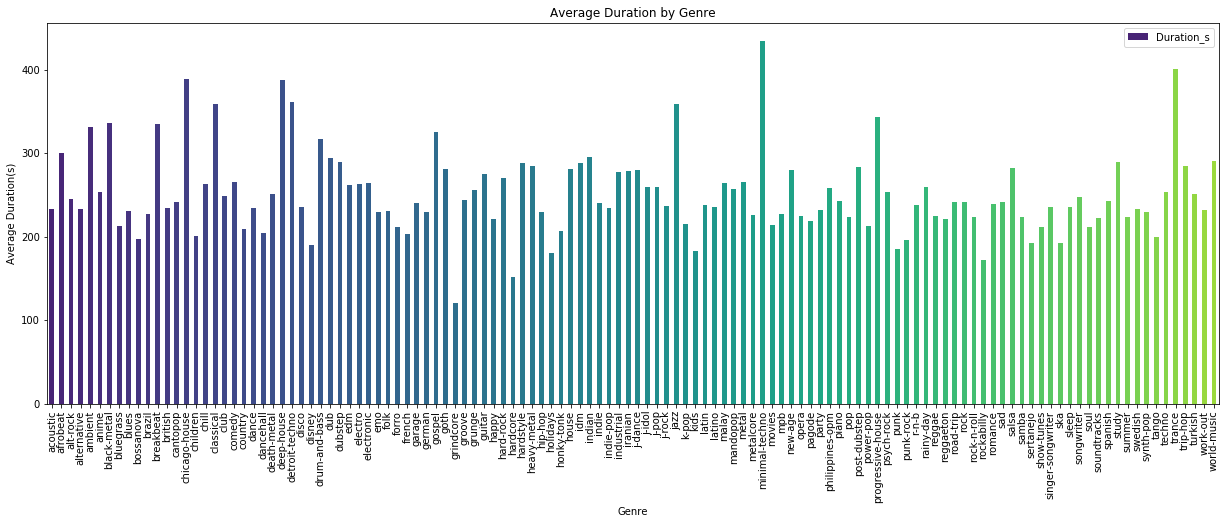

In [9]:

genre_duration = grouped_df[["Genre","Duration_ms"]]
genre_duration['Duration_s']= duration_s_list
genre_duration_s = genre_duration[["Genre","Duration_s"]]
color = cm.viridis(np.linspace(0.1, 0.9, 130))
ax = genre_duration_s.plot.bar(x='Genre', y='Duration_s', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.title("Average Duration by Genre")
plt.ylabel("Average Duration(s)")
plt.show
plt.savefig("outputs/Average_duration_bar_graph.png")

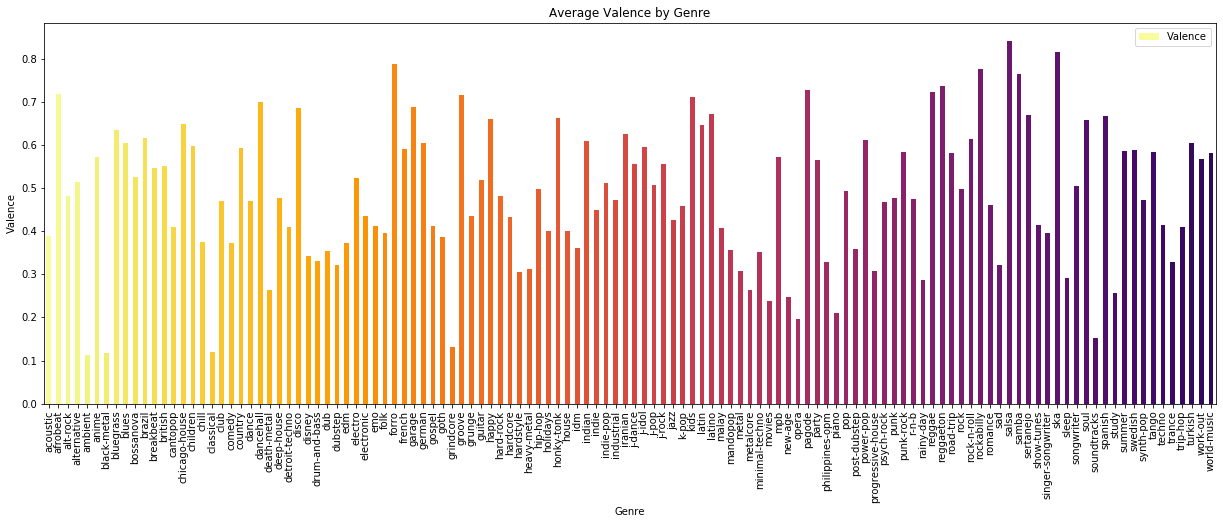

In [10]:
genre_valence=grouped_df[["Genre","Valence"]]
color = cm.inferno_r(np.linspace(0.01, 0.9, 130))
ax = genre_valence.plot.bar(x='Genre', y='Valence', rot=0,figsize=(21,7),color = color )
plt.title("Average Valence by Genre")
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Valence")
plt.show
plt.savefig("outputs/Average_Valence_bar_graph.png")

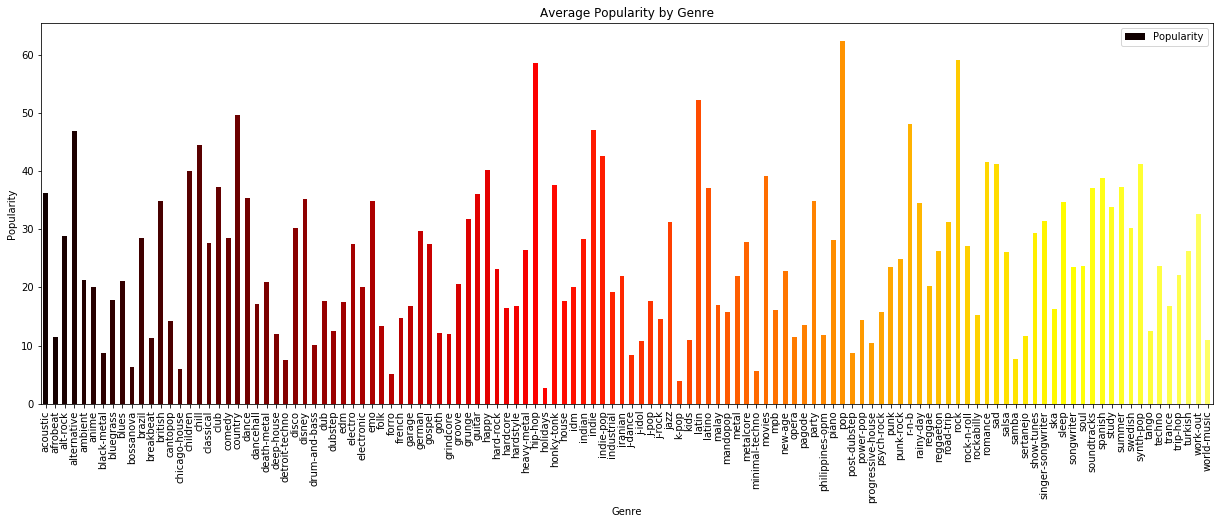

In [11]:
genre_popularity=grouped_df[["Genre","Popularity"]]
color = cm.hot(np.linspace(0.01, 0.9, 130))
ax = genre_popularity.plot.bar(x='Genre', y='Popularity', rot=0,figsize=(21,7),color = color )
plt.title("Average Popularity by Genre")
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Popularity")
plt.show
plt.savefig("outputs/Average_popularity_bar_graph.png")

In [20]:
#Define function for simple linear regression
def reg(d,i,f):
    dataframe= f[[d,i]]
    dataframe.plot.scatter( x=[d] , y=[i])
    
    x= dataframe[[d]]
    y= dataframe[[i]]
    
    model=LinearRegression()
    model.fit(x,y)
    beta=model.coef_
    alpha=model.intercept_
    yline=model.predict(x)
    plt.scatter(x,y)
    plt.plot(x, yline,"r")
    Rsquare=r2_score(y, yline)


    plt.title(f"{d} by {i}")
    plt.xlabel(f"{d}")
    plt.ylabel(f"{i}")
    
#----Display coeficient, intercept, and R^2
    print(f"\u03B2 ={beta}")
    print(f"\u03B1 ={alpha}")
    print(f"R^2={Rsquare}")
    plt.savefig(f"outputs/regress{d}_{i}.png")
    plt.show()

In [21]:
#Define function for scatter
def scatter(d,i,f):
    dataframe= f[[d,i]]
    dataframe.plot.scatter( x=[d] , y=[i])
    
    x= dataframe[[d]]
    y= dataframe[[i]]
    plt.scatter(x,y)


    plt.title(f"{d} by {i}")
    plt.xlabel(f"{d}")
    plt.ylabel(f"{i}")
    plt.savefig(f"outputs/scatter{d}_{i}.png")

    plt.show()

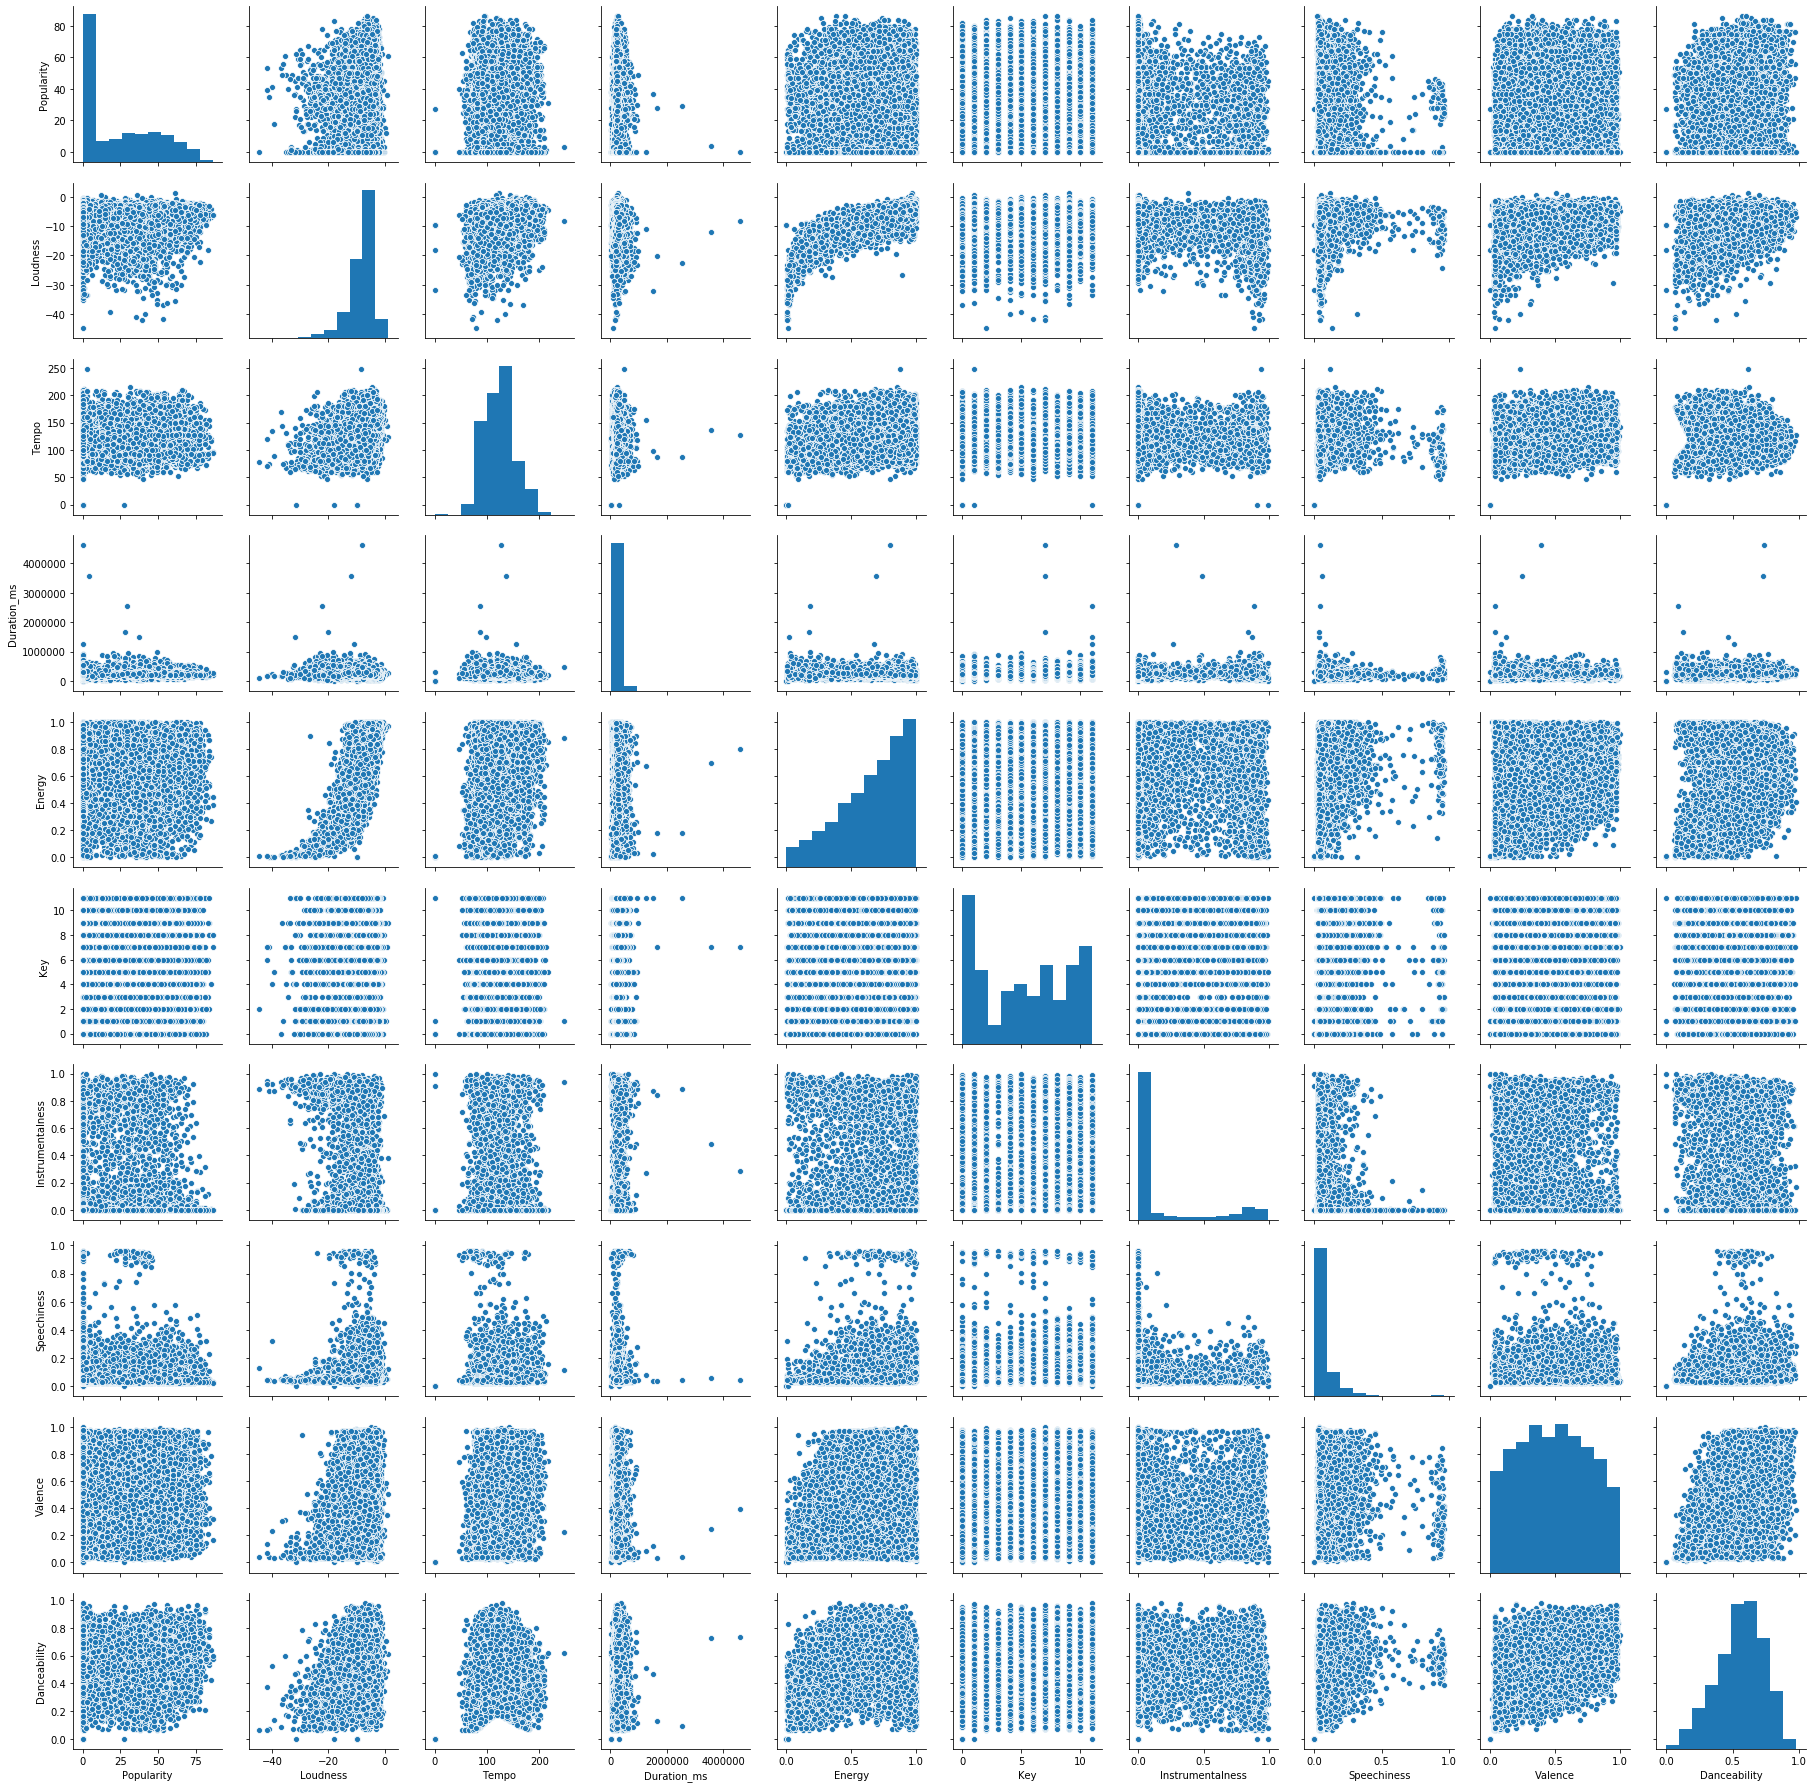

In [22]:
sns.pairplot(cleansed_df)
plt.savefig("outputs/all_scatters.png")

In [23]:
print (cleansed_df.corr())

                  Popularity  Loudness     Tempo  Duration_ms    Energy  \
Popularity          1.000000  0.052403 -0.020171    -0.043172 -0.009571   
Loudness            0.052403  1.000000  0.201829    -0.076562  0.780919   
Tempo              -0.020171  0.201829  1.000000     0.005266  0.241823   
Duration_ms        -0.043172 -0.076562  0.005266     1.000000 -0.016910   
Energy             -0.009571  0.780919  0.241823    -0.016910  1.000000   
Key                -0.015970  0.019445  0.013726     0.020560  0.033442   
Instrumentalness   -0.137900 -0.352824 -0.002552     0.230038 -0.127134   
Speechiness         0.002986  0.065639 -0.025267    -0.021821  0.158005   
Valence             0.000706  0.274935  0.075505    -0.181988  0.276685   
Danceability        0.017913  0.236653 -0.058870     0.020323  0.132700   

                       Key  Instrumentalness  Speechiness   Valence  \
Popularity       -0.015970         -0.137900     0.002986  0.000706   
Loudness          0.019445      

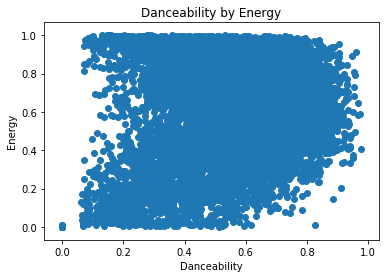

In [24]:
scatter("Danceability","Energy", cleansed_df)

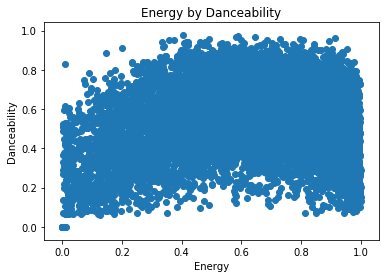

In [25]:
scatter("Energy","Danceability", cleansed_df)

β =[[0.09384123]]
α =[0.49366621]
R^2=0.01760938481733343


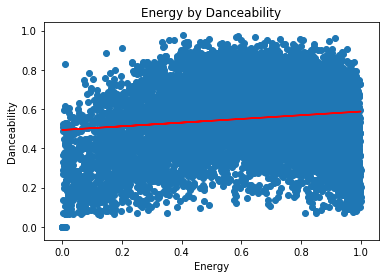

In [26]:
reg("Energy","Danceability", cleansed_df)

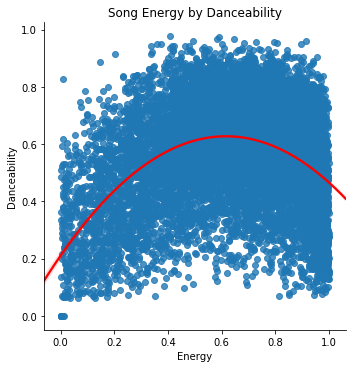

In [49]:
sns.lmplot("Energy","Danceability", cleansed_df, line_kws={'color': 'red'}, order=2)
title="energy_dance_parabola"
plt.title("Song Energy by Danceability")
plt.savefig(f"outputs/sns{title}.png")

In [28]:
#Generate a list of substantively interesting genres.
#Method: researcher's careful judgment (That's academic language for 
#I made it up. Suggestions for a better list are welcomed.)
substantive_list=["classical","country","electronic","jazz","hip-hop","rock","pop"]

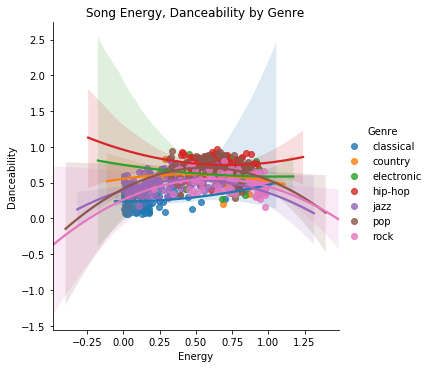

In [50]:
#Compare the relationship for each genre.
#It looks like pop music and rock music have the most "normal" looking relationship.
#We can also see that different genres have very different average energy distributions.

subs_df=cleansed_df.loc[cleansed_df["Genre"].isin(["classical","country","electronic","jazz","hip-hop","rock","pop"])]
sns.lmplot(x="Energy", y="Danceability", data=subs_df ,order=2, hue="Genre")
title="genrelist_parabolas"
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.title("Energy, Danceability by Genre")
plt.savefig(f"outputs/sns{title}.png")

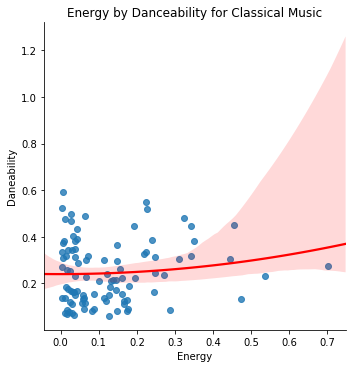

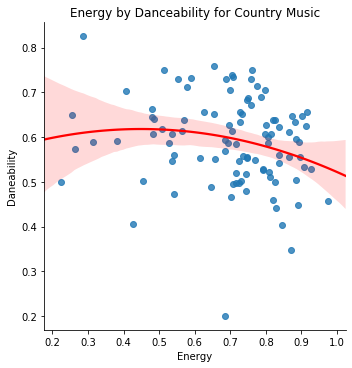

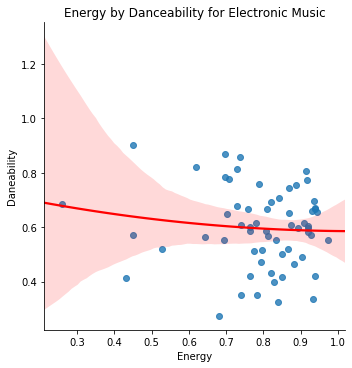

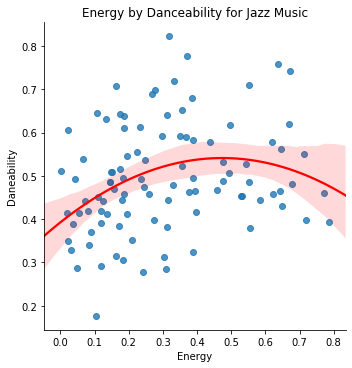

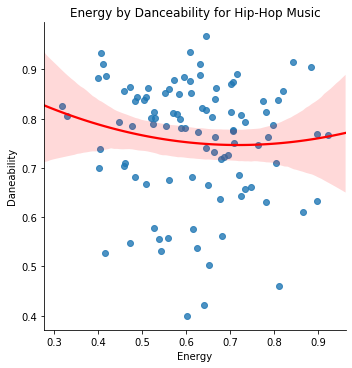

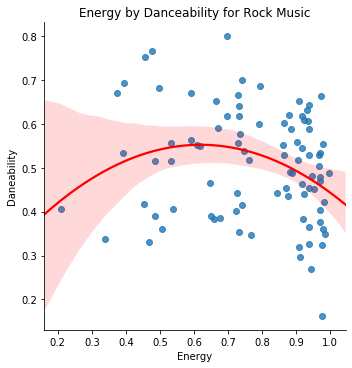

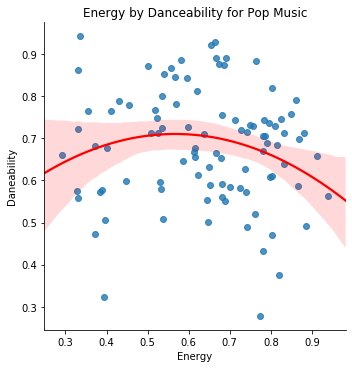

In [30]:
for genre in substantive_list:
    tempframe=cleansed_df.loc[cleansed_df["Genre"]==genre]
    sns.lmplot(x="Energy", y="Danceability", data=tempframe, order=2, line_kws={'color': 'red'})
    plt.title(f"Energy by Danceability for {genre.title()} Music")
    plt.xlabel(f"Energy")
    plt.ylabel(f"Daneability")
    title="by_genre"
    plt.savefig(f"outputs/{title}_{genre}.png")

In [31]:
# List of languages
language_genre_list = ['brazil', 'british', 'cantopop', 'mandopop', 'french', 'german', 'indian', 'iranian', 'malay', 'philippines-opm', 'spanish', 'swedish', 'turkish']
# List containing columns in scope.
audio_features_list = ['Genre', 'Popularity', 'Speechiness', 'Danceability', 'Valence', 'Energy']

# Dropping any Genres that do not appear in my 'language_genre_list'
language_genre_df = grouped_df[grouped_df['Genre'].isin(language_genre_list)]

# Only leaving those columns, for which I require data from
language_genre_df = language_genre_df[audio_features_list]

# Checking output
language_genre_df

Genre  Popularity  Speechiness  Danceability   Valence  \
10            brazil   28.440000     0.056120      0.599740  0.616890   
12           british   34.787234     0.058844      0.569553  0.550277   
13          cantopop   14.240000     0.045403      0.585050  0.408528   
37            french   14.760000     0.071697      0.590130  0.589400   
39            german   29.747368     0.100451      0.669968  0.605232   
56            indian   28.260000     0.068258      0.648450  0.608390   
60           iranian   21.919192     0.076417      0.597788  0.624657   
70             malay   17.060000     0.034917      0.512210  0.407363   
71          mandopop   15.690000     0.041140      0.558750  0.356843   
81   philippines-opm   11.800000     0.036099      0.471140  0.327407   
110          spanish   38.895349     0.057320      0.648616  0.666163   
113          swedish   30.280000     0.070209      0.588100  0.588300   
119          turkish   26.266667     0.062169      0.628053  0.604787   

       Energy  
10   0.603370  
12   0.743160  
13   0.486560  
37   0.534519  
39   0.727021  
56   0.663230  
60   0.623290  
70   0.551288  
71   0.497880  
81   0.476330  
110  0.720477  
113  0.705500  
119  0.702267

In [32]:
# Turning Valence and Energy (measurement scale = 0.0 - 1.0) into percentages, by multiplying by 100
language_genre_df["Energy"] = language_genre_df["Energy"] * 100
language_genre_df["Valence"] = language_genre_df["Valence"] * 100
language_genre_df["Danceability"] = language_genre_df["Danceability"] * 100
language_genre_df["Speechiness"] = language_genre_df["Speechiness"] * 1000

# Rounding to 2-decimal places.
language_genre_df = language_genre_df.round({"Popularity":2, "Speechiness":2, "Danceability":2, "Valence":2, "Energy":2}) 

# changing Genre name, to avoid ambiguity
language_genre_df.loc[81, 'Genre'] = 'philippines_opm'
      
# Checking output
language_genre_df

Genre  Popularity  Speechiness  Danceability  Valence  Energy
10            brazil       28.44        56.12         59.97    61.69   60.34
12           british       34.79        58.84         56.96    55.03   74.32
13          cantopop       14.24        45.40         58.51    40.85   48.66
37            french       14.76        71.70         59.01    58.94   53.45
39            german       29.75       100.45         67.00    60.52   72.70
56            indian       28.26        68.26         64.84    60.84   66.32
60           iranian       21.92        76.42         59.78    62.47   62.33
70             malay       17.06        34.92         51.22    40.74   55.13
71          mandopop       15.69        41.14         55.88    35.68   49.79
81   philippines_opm       11.80        36.10         47.11    32.74   47.63
110          spanish       38.90        57.32         64.86    66.62   72.05
113          swedish       30.28        70.21         58.81    58.83   70.55
119          turkish       26.27        62.17         62.81    60.48   70.23

In [33]:
# List to store Genre audio feature values
Genre_data_list =[]
# List containing names of audio features
audio_features = ["Popularity", "Energy", "Valence", "Danceability", "Speechiness"]
  
# Iterate over each row and creating a list of lists, containing genre data
for index, rows in language_genre_df.iterrows(): 
    # Create list for the current row 
    my_list =[rows.Popularity, rows.Speechiness, rows.Danceability, rows.Valence, rows.Energy]
    Genre_data_list.append(my_list)
Genre_data_list

# Dictionary - every key is a country and the values are audio features for tha key / country.
d = dict((country, Genre_data_list[idx]) for idx, country in enumerate(language_genre_list))
d

{'brazil': [28.44, 56.12, 59.97, 61.69, 60.34],
 'british': [34.79, 58.84, 56.96, 55.03, 74.32],
 'cantopop': [14.24, 45.4, 58.51, 40.85, 48.66],
 'mandopop': [14.76, 71.7, 59.01, 58.94, 53.45],
 'french': [29.75, 100.45, 67.0, 60.52, 72.7],
 'german': [28.26, 68.26, 64.84, 60.84, 66.32],
 'indian': [21.92, 76.42, 59.78, 62.47, 62.33],
 'iranian': [17.06, 34.92, 51.22, 40.74, 55.13],
 'malay': [15.69, 41.14, 55.88, 35.68, 49.79],
 'philippines-opm': [11.8, 36.1, 47.11, 32.74, 47.63],
 'spanish': [38.9, 57.32, 64.86, 66.62, 72.05],
 'swedish': [30.28, 70.21, 58.81, 58.83, 70.55],
 'turkish': [26.27, 62.17, 62.81, 60.48, 70.23]}

In [34]:
# Fig w-1 - European Audio Features

# EUROPEAN genres, containing values
french = (d.get('french'))
french = np.concatenate((french,[french[0]]))

german = (d.get('german'))
german = np.concatenate((german,[german[0]]))

spanish = (d.get('spanish'))
spanish = np.concatenate((spanish,[spanish[0]]))

swedish = (d.get('swedish'))
swedish = np.concatenate((swedish,[swedish[0]]))

In [35]:
# Calculating evenly-spaced angel coordinates. Using radians for the polar plot with 2 multipled by np pie
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(french))
print(2*np.pi, 'radians=', 2*np.degrees(2*np.pi), 'degrees')

6.283185307179586 radians= 720.0 degrees


In [36]:
print('radians', label_placement)
print('degrees', np.degrees(label_placement))

radians [0.         1.25663706 2.51327412 3.76991118 5.02654825 6.28318531]
degrees [  0.  72. 144. 216. 288. 360.]


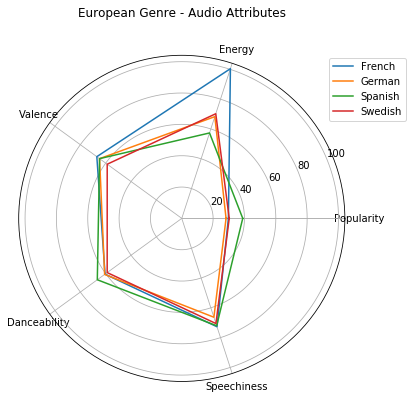

In [37]:
plt.figure(figsize = (6,6))
plt.subplot(polar=True)
plt.plot(label_placement, french)
plt.plot(label_placement, german)
plt.plot(label_placement, spanish)
plt.plot(label_placement, swedish)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels =audio_features)
plt.title('European Genre - Audio Attributes', y=1.1)
plt.legend(labels=['French', 'German', 'Spanish', 'Swedish'], loc=(0.95, 0.8))
plt.savefig(f"outputs/European_Genre_Audio_Attributes.png")

In [38]:
# fig w-2 - # Fig w-1 - Asian Audio Features

# Asian Genres lists, containing values
cantopop = (d.get('cantopop'))
cantopop = np.concatenate((cantopop,[cantopop[0]]))

indian = (d.get('indian'))
indian = np.concatenate((indian,[indian[0]]))

iranian = (d.get('iranian'))
iranian = np.concatenate((iranian,[iranian[0]]))

malay = (d.get('malay'))
malay = np.concatenate((malay,[malay[0]]))

mandopop = (d.get('mandopop'))
mandopop = np.concatenate((mandopop,[mandopop[0]]))

philippines_opm = (d.get('philippines-opm'))
philippines_opm = np.concatenate((philippines_opm,[philippines_opm[0]]))

In [39]:
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(cantopop))
print(2*np.pi, 'radians=', 2*np.degrees(2*np.pi), 'degrees')

6.283185307179586 radians= 720.0 degrees


In [40]:
print('radians', label_placement)
print('degrees', np.degrees(label_placement))

radians [0.         1.25663706 2.51327412 3.76991118 5.02654825 6.28318531]
degrees [  0.  72. 144. 216. 288. 360.]


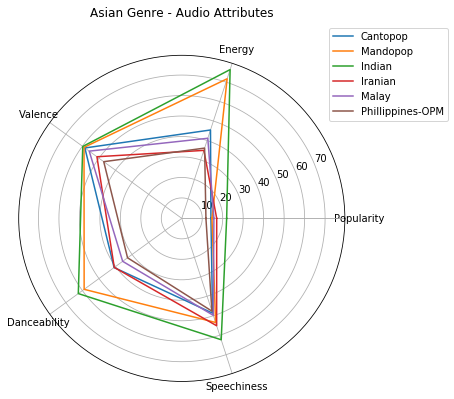

In [41]:
plt.figure(figsize = (6,6))
plt.subplot(polar=True)
plt.plot(label_placement, cantopop)
plt.plot(label_placement, mandopop)
plt.plot(label_placement, indian)
plt.plot(label_placement, iranian)
plt.plot(label_placement, malay)
plt.plot(label_placement, philippines_opm)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels =audio_features)
plt.title('Asian Genre - Audio Attributes', y=1.1)
plt.legend(labels=['Cantopop', 'Mandopop', 'Indian', 'Iranian', 'Malay', 'Phillippines-OPM'], loc=(0.95, 0.8))
plt.savefig(f"outputs/Asian_Genre_Audio_Attributes.png")

In [42]:
#Drop -1 values (None found)
    # Get names of indexes for which column Key has value -1
#indexNames = gkeys[ gkeys['Key'] == -1 ].index
    # Delete these row indexes from dataFrame
#gkeys.drop(indexNames , inplace=True)
    
    #Convert Key Column to string and replace numeric values with Lettered pitch class
cleansed_df['Key'] = cleansed_df['Key'].astype(str)
cleansed_df['Key'].replace({"0": "C", 
                             "1": "C#, Db", 
                             "2": "D", 
                             "3":"D#, Eb",
                             "4": "E", 
                             "5": "F", 
                             "6": "F#, Gb", 
                             "7": "G", 
                             "8": "G#, Ab", 
                             "9": "A", 
                             "10": "A#, Bb", 
                             "11":"B"}, inplace=True)
cleansed_df

Genre                                         Track Name  \
0         acoustic                                               Free   
1         acoustic                                    Better Together   
2         acoustic                                          Good Life   
3         acoustic          When I Was Your Man (feat. Fifth Harmony)   
4         acoustic                                        Bad Romance   
5         acoustic                                      Jar of Hearts   
6         acoustic                                               Baby   
7         acoustic                       Keep It Loose, Keep It Tight   
8         acoustic                                            Trouble   
9         acoustic                                        Skinny Love   
10        acoustic                      Last Kiss (feat. Megan & Liz)   
11        acoustic                                               Kids   
12        acoustic                                            Fix You   
13        acoustic                                               E.T.   
14        acoustic             Chasing Pavements (Live at Hotel Cafe)   
15        acoustic                                   Hey, Soul Sister   
16        acoustic                    I Will Follow You Into The Dark   
17        acoustic                                    Banana Pancakes   
18        acoustic                                             U.N.I.   
19        acoustic                                          Only Love   
20        acoustic                                         Wonderwall   
21        acoustic       Next To Me - Live From Spotify NYC, USA/2012   
22        acoustic                                               Roar   
23        acoustic                                  Hey There Delilah   
24        acoustic                                           Delicate   
25        acoustic                                  Welcome Home, Son   
26        acoustic       What The Water Gave Me - MTV Unplugged, 2012   
27        acoustic                                        Skinny Love   
28        acoustic  Valerie - Live At BBC Radio 1 Live Lounge, Lon...   
29        acoustic               Use Somebody (feat. Hannah Trigwell)   
...            ...                                                ...   
10787  world-music                                              Orion   
10788  world-music                                         Pulo, Pulo   
10789  world-music                                           Golgotha   
10790  world-music                                            Friends   
10791  world-music                                      Langue Muette   
10792  world-music                              Amor De Loca Juventud   
10793  world-music                      365 Is My Number/ The Message   
10794  world-music                                           Slow Jam   
10795  world-music                                 Ride with Yourself   
10796  world-music                                             Sebero   
10797  world-music                                          Iyo Djeli   
10798  world-music                                            Sedjedo   
10799  world-music               Dream Weaver - Wayne's World Version   
10800  world-music                                   Beautiful Africa   
10801  world-music                                              Guisa   
10802  world-music                        Bala - feat. Zoumana Tereta   
10803  world-music                                              Suraj   
10804  world-music                                         Kita Kaira   
10805  world-music                                          Chan Chan   
10806  world-music                                    Welcome to Mali   
10807  world-music            Schumann - Kreisleriana, Opus 16 (1838)   
10808  world-music                                            Namania   
10809  world-music                                             Birima  

In [45]:
#Print a list of all available genres to choose
genre_counts = cleansed_df["Genre"].value_counts()
pd.set_option('display.max_rows', 1000)
genre_counts

goth                 100
k-pop                100
grindcore            100
alt-rock             100
holidays             100
mandopop             100
tango                100
blues                100
bossanova            100
chicago-house        100
cantopop             100
latin                100
afrobeat             100
breakbeat            100
indian               100
french               100
gospel               100
swedish              100
hardstyle            100
philippines-opm      100
country              100
ambient              100
forro                100
acoustic             100
bluegrass            100
hardcore             100
j-dance              100
honky-tonk           100
opera                100
anime                100
black-metal          100
brazil               100
death-metal          100
malay                100
pagode               100
dancehall            100
comedy               100
classical             99
latino                99
dance                 99


In [46]:
#input function to get genre
genre = input("Pick a genre... ")
#boolean check if genre matches input, then populates all songs within 'genre' input into new dataframe
genre_check = cleansed_df['Genre']== genre
g_check = cleansed_df[genre_check]
genre_df = pd.DataFrame(g_check)
genre_df

Pick a genre... jazz


Genre                                         Track Name  \
6133  jazz                                          Lazy Bird   
6134  jazz                                 Moonlight Serenade   
6135  jazz                      Karl-Bertil Jonssons Julafton   
6136  jazz                                    I Know You Know   
6137  jazz                                              Haupe   
6138  jazz                                  Cantaloupe Island   
6139  jazz                                    Taxi War- Dance   
6140  jazz                    Fly Me To The Moon - Remastered   
6141  jazz                           Journey in Satchidananda   
6142  jazz  Split Feelin's - Remastered 1999/Rudy Van Geld...   
6143  jazz                                           Birdland   
6144  jazz                             I Still Believe in You   
6145  jazz                                     Maple Leaf Rag   
6146  jazz                                        Doctor Jazz   
6147  jazz                            Come Rain Or Come Shine   
6148  jazz                                Stella By Starlight   
6149  jazz                                        Blue Ballad   
6150  jazz                                       Ruby My Dear   
6151  jazz                        The Thought Of You - Part I   
6152  jazz                                       Proto-Cosmos   
6153  jazz                                       Bemsha Swing   
6154  jazz                             The Drum Thunder Suite   
6155  jazz  My Foolish Heart - Live At Town Hall, New York...   
6156  jazz                                    Interlude No. 3   
6157  jazz                                 Take The "A" Train   
6158  jazz                                  Bossa Nova U.S.A.   
6159  jazz                       Everybody Loves The Sunshine   
6160  jazz                                              Spain   
6161  jazz                                Angel Eyes - Studio   
6162  jazz                  Boplicity - 2000 Digital Remaster   
6163  jazz  Infant Eyes - Remastered1998/Rudy Van Gelder E...   
6164  jazz                                         Vibrations   
6165  jazz                                      Hat And Beard   
6166  jazz                                         Namely You   
6167  jazz                                  Just You, Just Me   
6168  jazz                                            Moanin'   
6169  jazz              In The Wee Small Hours Of The Morning   
6170  jazz                                        Easy Living   
6171  jazz                                         Directions   
6172  jazz                                             Lingus   
6173  jazz                                              Birth   
6174  jazz                                      Don't Explain   
6175  jazz  You Don't Know What Love Is - Rudy Van Gelder ...   
6176  jazz                               Blame It On My Youth   
6177  jazz                                     Stolen Moments   
6178  jazz                              Twilight...And Beyond   
6179  jazz                       Blue Train - Remastered 2003   
6180  jazz                         Lady Day and John Coltrane   
6181  jazz                        Desafinado - Stereo Version   
6182  jazz                                 My Funny Valentine   
6183  jazz                              Monk's Dream - Take 8   
6184  jazz                                          All Blues   
6185  jazz                               My One And Only Love   
6186  jazz                            Scrapple From The Apple   
6187  jazz                                            Moanin'   
6188  jazz                                            Hipster   
6189  jazz                          Tribute to Alice Coltrane   
6190  jazz                                    Channel 1 Suite   
6191  jazz                         You've Got To Have Freedom   
6192  jazz                                               Acid   
6193  jazz                              

In [47]:
#Construct dataframe of Key Counts of the Genre-specific dataframe
gkeys = genre_df.loc[:, ["Key"]]
keycounts = gkeys["Key"].value_counts()
keycounts_df = pd.DataFrame(keycounts)
keycounts_df = keycounts_df.rename(columns={"Key":"Count"})
keycounts_df

Count
F          19
G#, Ab     14
D          12
C          10
G           9
C#, Db      9
D#, Eb      6
A#, Bb      6
E           5
F#, Gb      5
A           3
B           1

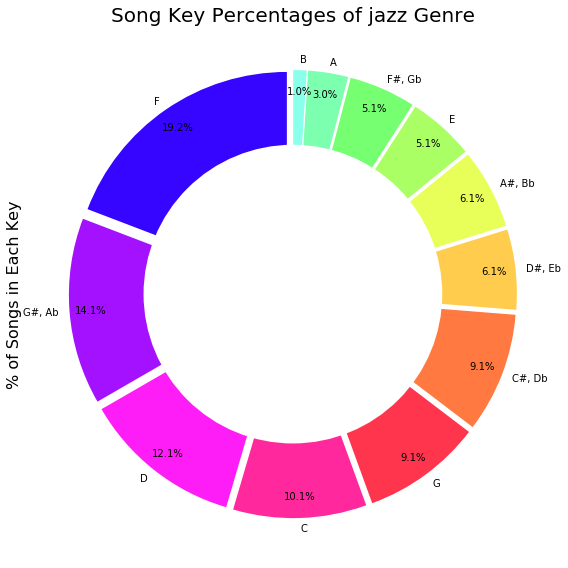

In [48]:
#Plot Key Counts Dataframe
#Assign variables
colors = ['#3505FF', '#A311FF', '#FF1DF7', '#FF299D', '#FF354E', '#FF7941', '#FFCC4D', '#E8FF59', '#AAFF65', '#75FF71', '#7DFFB0', '#8AFFE9']
labels = list(keycounts_df.index.values)
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

#plot
keycounts_df.plot.pie(y='Count', colors = colors, labels=labels, legend=None, autopct='%1.1f%%', pctdistance=0.9, labeldistance=1.05, explode = explode, startangle=90, figsize=(8,8))

#Create center circle for donut chart
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Format Title and Labels and save
plt.title('Song Key Percentages of ' + genre + ' Genre', fontsize=20)
plt.ylabel('% of Songs in Each Key', fontsize=16)
plt.tight_layout()
plt.savefig('outputs/' + genre + '_keys.png')